In [6]:
#pip install mysql-connector-python

Data Mining from mysql

In [7]:
import mysql.connector

In [8]:
#conncet to server
cnx=mysql.connector.connect(
   host="127.0.0.1",
   port=3306,
   user="root",
   password="Althaf@1")

In [11]:
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="Althaf@1",
    database="Studmarks")

df=pd.read_sql_query("select *from Student_marks",con)
df

,id,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,1,John,M,-1997,55,45,56,87,21,52,89,65
1,2,Suresh,M,-1988,75,96,78,64,90,61,58,2
2,3,Ramesh,M,-1969,25,54,89,76,95,87,56,74
3,4,Jessica,F,-1986,78,96,86,63,54,89,75,45
4,5,Jennifer,F,-1996,58,96,78,46,96,77,83,53
5,6,Annu,F,-1987,45,87,52,89,55,89,87,52
6,7,Pooja,F,-1988,55,64,61,58,75,58,64,61
7,8,Ritesh,M,-1969,54,76,87,56,25,56,76,87
8,9,Farha,F,-1986,55,63,89,75,78,75,63,89
9,10,Mukesh,M,-1996,96,46,77,83,58,83,46,77


Applying EDA process

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('Student_marks.csv')
df.head()

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


In [14]:
df.shape

(10, 11)

In [15]:
df.dtypes

Unnamed: 0    object
Gender        object
DOB           object
Maths          int64
Physics        int64
Chemistry      int64
English        int64
Biology        int64
Economics      int64
History        int64
Civics         int64
dtype: object

In [16]:
df.columns

Index(['Unnamed: 0', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry',
       'English', 'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     object
 1   Gender      10 non-null     object
 2   DOB         10 non-null     object
 3   Maths       10 non-null     int64 
 4   Physics     10 non-null     int64 
 5   Chemistry   10 non-null     int64 
 6   English     10 non-null     int64 
 7   Biology     10 non-null     int64 
 8   Economics   10 non-null     int64 
 9   History     10 non-null     int64 
 10  Civics      10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


summary statistics

In [18]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


key observations: 
1 The mean is more than median (50th percentile) in all columns except civics Right skewed data is present

2 There is a large difference in 75% percentile and max in Maths,civics

3 The 1 and 2 observations suggest that there are extreme outliers present in these three columns

Data visualizations

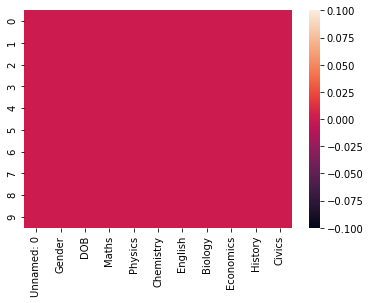

In [28]:
sns.heatmap(df.isnull())

Dataset has no missing values.


To check correlation

In [30]:
dfcor=df.corr()
dfcor

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


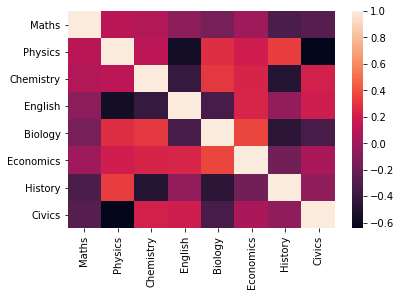

In [31]:
sns.heatmap(dfcor)

In [32]:
sns.color_palette?

In [33]:
sns.heatmap?

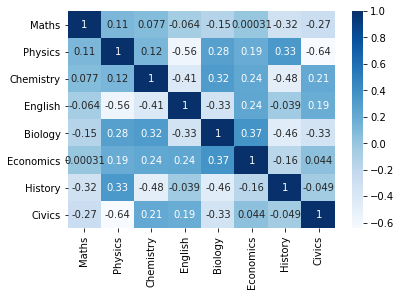

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [36]:
sns.heatmap?

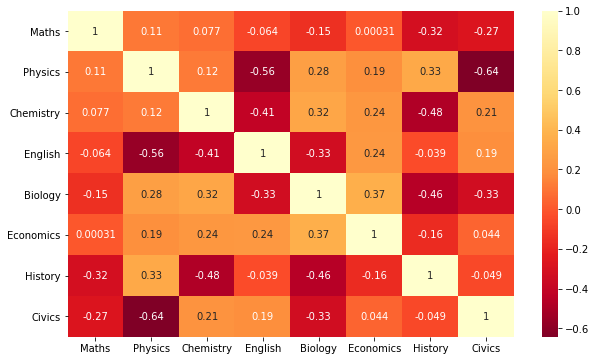

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [46]:
sns.heatmap?

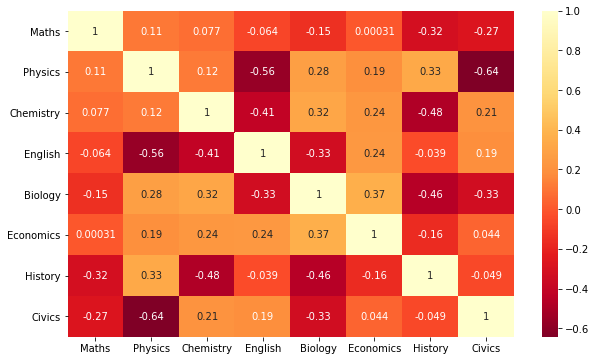

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [50]:
df.columns

Index(['Unnamed: 0', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry',
       'English', 'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

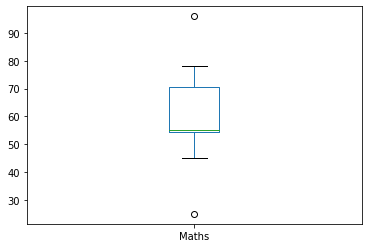

In [51]:
#univariate analysis
df['Maths'].plot.box()

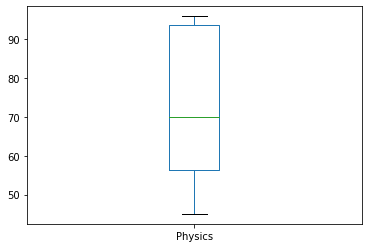

In [53]:
df['Physics'].plot.box()

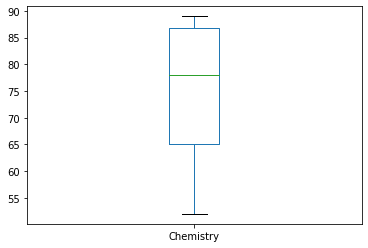

In [54]:
df['Chemistry'].plot.box()

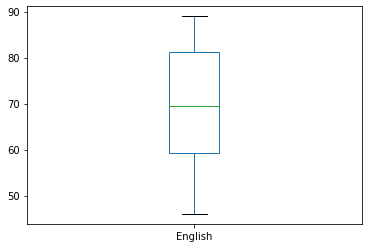

In [55]:
df['English'].plot.box()

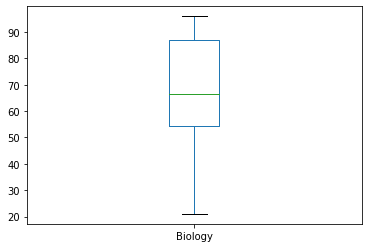

In [56]:
df['Biology'].plot.box()

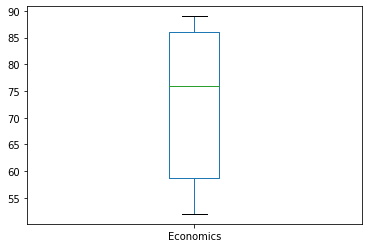

In [57]:
df['Economics'].plot.box()

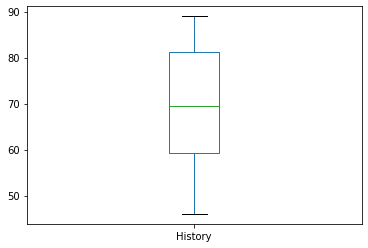

In [58]:
df['History'].plot.box()

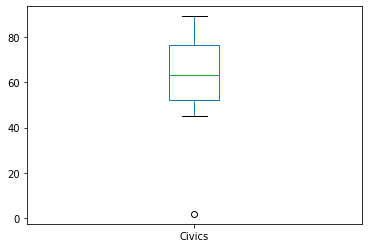

In [59]:
df['Civics'].plot.box()

In [60]:
df.shape

(10, 11)

In [63]:
collist=df.columns.values
ncol=11
nrows=10

In [64]:
plt.subplot?